In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

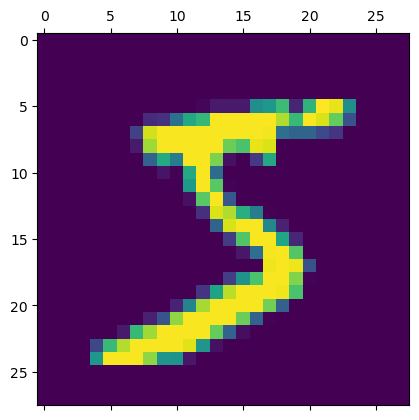

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [21]:
X_train=X_train/255
X_test=X_test/255

In [22]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_train_flat.shape

(60000, 784)

In [23]:
X_test_flat=X_test.reshape(len(X_test),28*28)
X_test_flat.shape

(10000, 784)

### Neural network designing

In [39]:
model=keras.Sequential([                                #sequential means having stack of layers in NN
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')  
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    
)

model.fit(X_train_flat,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4753 - accuracy: 0.8753
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3048 - accuracy: 0.9149
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2838 - accuracy: 0.9210
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9231
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2672 - accuracy: 0.9260
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2620 - accuracy: 0.9270
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2584 - accuracy: 0.9284
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2555 - accuracy: 0.9284
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2532 - accuracy: 0.9299
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [40]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2712 - accuracy: 0.9263


[0.27116069197654724, 0.9262999892234802]

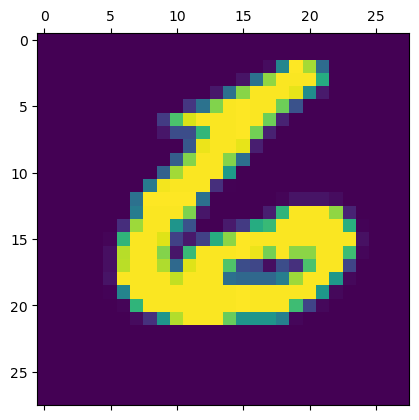

In [45]:
plt.matshow(X_test[9999])

In [42]:
(y_test[500])

3

In [43]:
y_pred=model.predict(X_test_flat)
y_pred[9999]

313/313 [==============================] - 0s 1ms/step


array([1.05002357e-04, 7.27406308e-13, 1.53449565e-01, 2.11621182e-06,
       1.80203788e-05, 1.24617955e-02, 9.99545515e-01, 6.39142686e-15,
       3.76962180e-06, 1.58362948e-10], dtype=float32)

In [44]:
np.argmax(y_pred[9999])

6

In [46]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [47]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    7,    8,    3,    2,    0],
       [   0, 1106,    5,    2,    0,    1,    3,    2,   16,    0],
       [   6,    7,  923,   15,    7,    3,   11,   10,   47,    3],
       [   5,    0,   20,  908,    0,   27,    3,   11,   30,    6],
       [   1,    1,    8,    1,  912,    0,    9,    7,   10,   33],
       [  10,    2,    2,   30,    7,  774,   14,    8,   41,    4],
       [  13,    3,    9,    0,    7,   10,  910,    1,    5,    0],
       [   2,    5,   24,    4,    6,    1,    0,  957,    4,   25],
       [   5,    5,    5,   15,    7,   14,    5,    9,  903,    6],
       [   9,    7,    1,    8,   23,    6,    0,   27,   14,  914]])>

Text(95.72222222222221, 0.5, 'Truth')

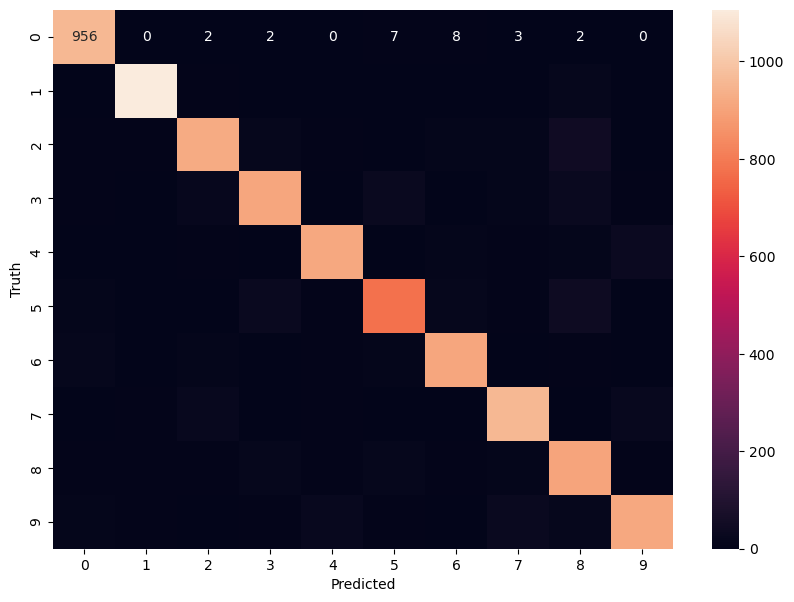

In [51]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')